In [2]:
# Step 1 - DATA CLEANING
import pandas as pd 
vehicle_df = pd.read_csv("vehicle_details.csv") 
vehicle_df["manufacture_year"]=pd.to_numeric(vehicle_df["manufacture_year"])
vehicle_df["mileage"]=pd.to_numeric(vehicle_df["mileage"]) 
vehicle_df["mileage"]=vehicle_df["mileage"].fillna(vehicle_df["mileage"].mean())
print("Cleaned Vehicles details dataset")
print(vehicle_df)

Cleaned Vehicles details dataset
  vehicle_id vehicle_type  manufacture_year  mileage
0       V001        Truck              2018    12.00
1       V002          Van              2020    15.00
2       V003         Bike              2021    40.00
3       V004        Truck              2017    20.25
4       V005          Van              2019    14.00


In [3]:
import pandas as pd 
driver_df=pd.read_csv("Driver_logs.csv") 
driver_df["experience_years"]=pd.to_numeric(driver_df["experience_years"]) 
driver_df["driver_rating"]=pd.to_numeric(driver_df["driver_rating"]) 
driver_df["experience_years"]=driver_df["experience_years"].fillna(driver_df["experience_years"].mean()) 
driver_df["driver_rating"]=driver_df["driver_rating"].fillna(driver_df["driver_rating"].mean()) 
print("Cleaned driver logs dataset") 
print(driver_df)

Cleaned driver logs dataset
  driver_id driver_name  experience_years  driver_rating
0      D001        Ravi              5.00            4.2
1      D002      Suresh              3.00            4.5
2      D003        Amit              2.00            4.4
3      D004       Sunil              7.00            4.8
4      D005       Manoj              4.25            4.1


In [4]:
import pandas as pd
GPS_logs_df=pd.read_csv("GPS_routes_logs.csv")
GPS_logs_df["distance_km"]=pd.to_numeric(GPS_logs_df["distance_km"])
print("Cleaned GPS routes logs dataset")
print(GPS_logs_df)



Cleaned GPS routes logs dataset
  route_id route_type  distance_km traffic_level
0     R001       City          120          High
1     R002    Highway          300           Low
2     R003      Rural          180        Medium
3     R004       City           90          High
4     R005    Highway          250           Low


In [6]:
import pandas as pd
fuel_logs_df=pd.read_csv("Fuel_logs.csv")
fuel_logs_df["trip_date"]=pd.to_datetime(fuel_logs_df["trip_date"])
fuel_logs_df["fuel_consumed"]=pd.to_numeric(fuel_logs_df["fuel_consumed"])
fuel_logs_df["fuel_cost"]=pd.to_numeric(fuel_logs_df["fuel_cost"])
fuel_logs_df["trip_date"] =fuel_logs_df["trip_date"].fillna(fuel_logs_df["trip_date"].mode()[0])
fuel_logs_df["fuel_consumed"]=fuel_logs_df["fuel_consumed"].fillna(fuel_logs_df["fuel_consumed"].mean())
fuel_logs_df["fuel_cost"]=fuel_logs_df["fuel_cost"].fillna(fuel_logs_df["fuel_cost"].mean())
print("Cleaned fuel logs dataset")
print(fuel_logs_df)

Cleaned fuel logs dataset
  trip_id vehicle_id driver_id route_id  trip_date  fuel_consumed  fuel_cost
0    T001       V001      D001     R001 2024-01-10          20.00       2100
1    T002       V002      D002     R002 2024-01-11          18.00       1900
2    T003       V003      D003     R003 2024-01-10           5.00        600
3    T004       V004      D004     R004 2024-01-13          14.75       1800
4    T005       V005      D005     R005 2024-01-14          16.00       1700


In [7]:
import pandas as pd
delivery_logs_df=pd.read_csv("Delivery_timelines.csv")
delivery_logs_df["planned_time"]=pd.to_numeric(delivery_logs_df["planned_time"])
delivery_logs_df["actual-time"]=pd.to_numeric(delivery_logs_df["actual_time"])
delivery_logs_df["delay_minutes"]=pd.to_numeric(delivery_logs_df["delay_minutes"])
print("Cleaned delivery timelines logs dataset")
print(delivery_logs_df)

Cleaned delivery timelines logs dataset
  trip_id  planned_time  actual_time  delay_minutes  actual-time
0    T001           120          140             20          140
1    T002           180          175             -5          175
2    T003           150          170             20          170
3    T004            90          120             30          120
4    T005           200          195             -5          195


In [8]:
import pandas as pd
maintainance_logs_df=pd.read_csv("Maintenance_history.csv")
maintainance_logs_df["service_date"]=pd.to_datetime(maintainance_logs_df["service_date"])
maintainance_logs_df["maintenance_cost"]=pd.to_numeric(maintainance_logs_df["maintenance_cost"])
maintainance_logs_df["maintenance_cost"]=maintainance_logs_df["maintenance_cost"].fillna(maintainance_logs_df["maintenance_cost"].mean())
print("Cleaned maintainance history logs dataset")
print(maintainance_logs_df)

Cleaned maintainance history logs dataset
  vehicle_id service_date  maintenance_cost
0       V001   2024-01-05            5000.0
1       V002   2024-01-08            3000.0
2       V003   2024-01-12            3750.0
3       V004   2024-01-15            4500.0
4       V005   2024-01-18            2500.0


In [9]:
# Step 2 - DATA ENGINEERING
import pandas as pd
#datasets merged
final_dataset_df = fuel_logs_df.merge(GPS_logs_df,on="route_id",how="left"
)
final_dataset_df = final_dataset_df.merge(vehicle_df,on="vehicle_id",how="left")
final_dataset_df = final_dataset_df.merge(driver_df,on="driver_id",how="left")
final_dataset_df = final_dataset_df.merge( delivery_logs_df,on="trip_id",how="left")
final_dataset_df = final_dataset_df.merge(maintainance_logs_df,on="vehicle_id",how="left")
#feature engineering
final_dataset_df["fuel_efficiency"]=final_dataset_df["distance_km"]/final_dataset_df["fuel_consumed"]
difficulty_map = {
    "Low": 1,"Medium": 2,"High": 3}
final_dataset_df["route_difficulty_score"] = final_dataset_df["traffic_level"].map(difficulty_map)
final_dataset_df["total_trip_cost"] = (final_dataset_df["fuel_cost"]+final_dataset_df["maintenance_cost"])
#Final datset
Final_master_df=final_dataset_df[
    ["vehicle_id","driver_id","trip_date","distance_km","fuel_consumed","fuel_efficiency",
     "route_difficulty_score","traffic_level","delay_minutes","maintenance_cost","total_trip_cost"]]
print("Data merging completed")
print(Final_master_df)


Data merging completed
  vehicle_id driver_id  trip_date  distance_km  fuel_consumed  \
0       V001      D001 2024-01-10          120          20.00   
1       V002      D002 2024-01-11          300          18.00   
2       V003      D003 2024-01-10          180           5.00   
3       V004      D004 2024-01-13           90          14.75   
4       V005      D005 2024-01-14          250          16.00   

   fuel_efficiency  route_difficulty_score traffic_level  delay_minutes  \
0         6.000000                       3          High             20   
1        16.666667                       1           Low             -5   
2        36.000000                       2        Medium             20   
3         6.101695                       3          High             30   
4        15.625000                       1           Low             -5   

   maintenance_cost  total_trip_cost  
0            5000.0           7100.0  
1            3000.0           4900.0  
2            3750.

<function matplotlib.pyplot.show(close=None, block=None)>

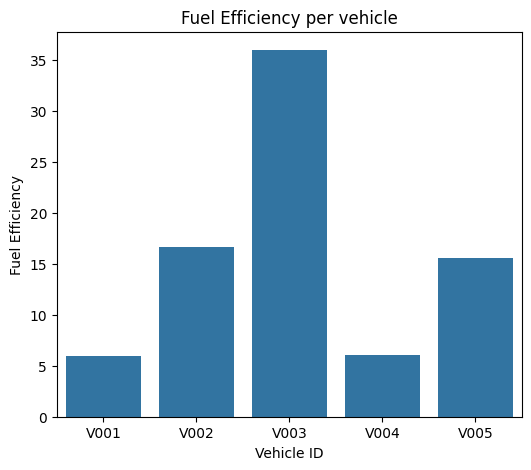

In [10]:
# Step 3 - Exploratory Data Analysis (EDA) 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Fuel efficiency trends per vehicle
plt.figure(figsize=(6,5))
sns.barplot(data=Final_master_df,x="vehicle_id",y="fuel_efficiency")
plt.title("Fuel Efficiency per vehicle")
plt.xlabel("Vehicle ID")
plt.ylabel("Fuel Efficiency")
plt.show

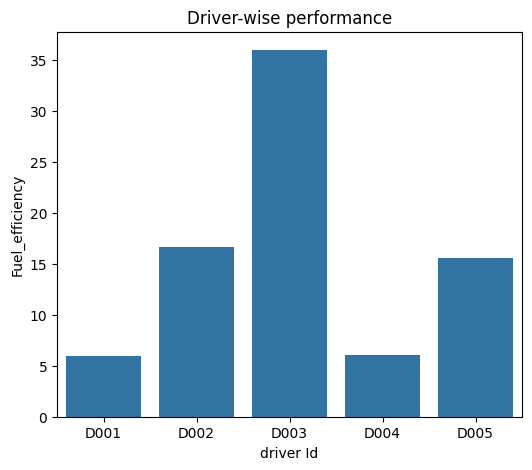

In [11]:
#Driver-wise performance score
driver_performance = Final_master_df.groupby("driver_id",as_index=False)["fuel_efficiency"].mean()
plt.figure(figsize=(6,5))
sns.barplot(data=driver_performance,x="driver_id",y="fuel_efficiency")
plt.title("Driver-wise performance")
plt.xlabel("driver Id")
plt.ylabel("Fuel_efficiency")
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

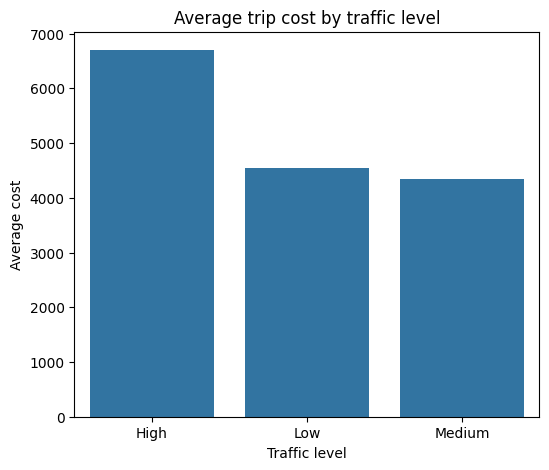

In [12]:
#Most expensive routes
route_cost=Final_master_df.groupby("traffic_level",as_index=False)["total_trip_cost"].mean()
plt.figure(figsize=(6,5))
sns.barplot(data=route_cost,x="traffic_level",y="total_trip_cost")
plt.title("Average trip cost by traffic level")
plt.xlabel("Traffic level")
plt.ylabel("Average cost")
plt.show

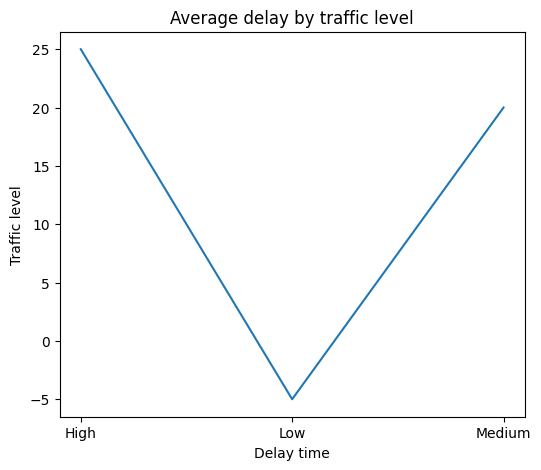

In [13]:
#Most delay routes
delay_analysis=Final_master_df.groupby("traffic_level",as_index=False)["delay_minutes"].mean()
plt.figure(figsize=(6,5))
sns.lineplot(data=delay_analysis,x="traffic_level",y="delay_minutes")
plt.title("Average delay by traffic level")
plt.xlabel("Delay time")
plt.ylabel("Traffic level")
plt.show()

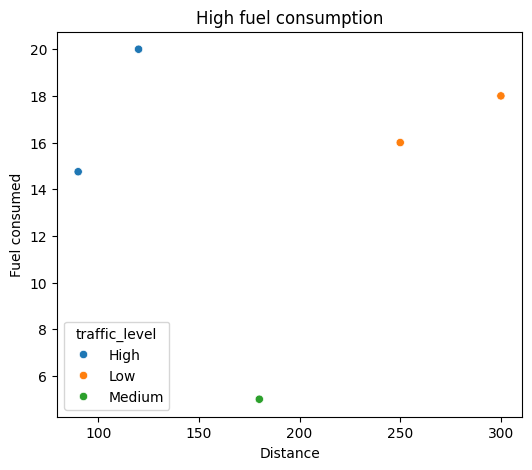

In [14]:
#High fuel consumption
plt.figure(figsize=(6,5))
sns.scatterplot(data=Final_master_df,x="distance_km",y="fuel_consumed",hue="traffic_level")
plt.title("High fuel consumption")
plt.xlabel("Distance")
plt.ylabel("Fuel consumed")
plt.show()


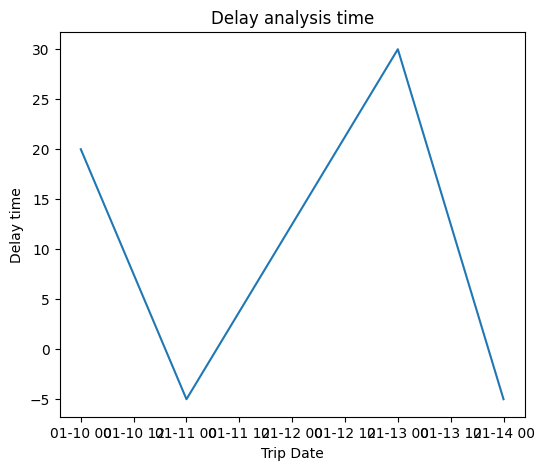

In [15]:
#Delay analysis
plt.figure(figsize=(6,5))
sns.lineplot(data=Final_master_df,x="trip_date",y="delay_minutes")
plt.title("Delay analysis time")
plt.xlabel("Trip Date")
plt.ylabel("Delay time")
plt.show()


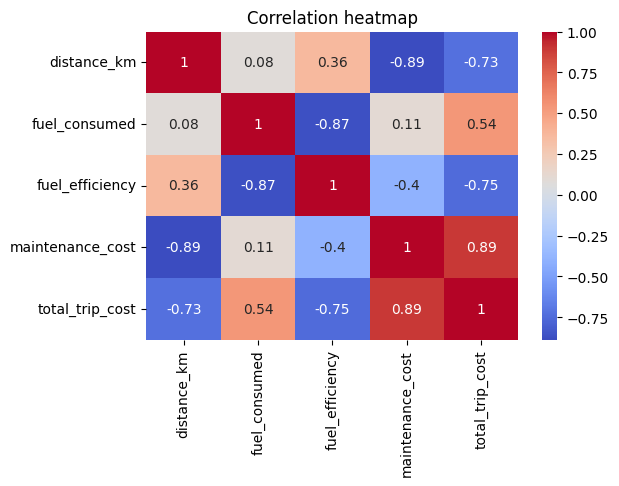

In [16]:
#Correlation heatmap
correlation = Final_master_df[
    ["distance_km",
     "fuel_consumed",
     "fuel_efficiency",
     "maintenance_cost",
     "total_trip_cost"]
].corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()


In [17]:
# Step 4 - Route Cost & Fuel Efficiency Analysis 
# Cost per km
Final_master_df["cost_per_km"] = (
    Final_master_df["total_trip_cost"] / Final_master_df["distance_km"]
)

print(Final_master_df[["distance_km", "total_trip_cost", "cost_per_km"]].head())


   distance_km  total_trip_cost  cost_per_km
0          120           7100.0    59.166667
1          300           4900.0    16.333333
2          180           4350.0    24.166667
3           90           6300.0    70.000000
4          250           4200.0    16.800000


C:\Users\nagal\AppData\Local\Temp\ipykernel_19800\3399340705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_master_df["cost_per_km"] = (


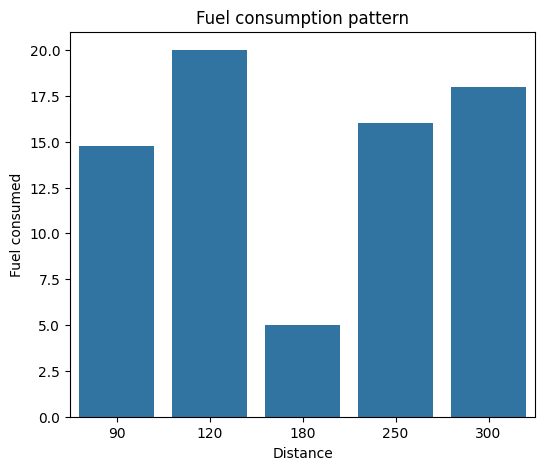

In [18]:
#Fuel consumption patterns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
sns.barplot(data=Final_master_df,x="distance_km",y="fuel_consumed")
plt.title("Fuel consumption pattern")
plt.xlabel("Distance")
plt.ylabel("Fuel consumed")
plt.show()

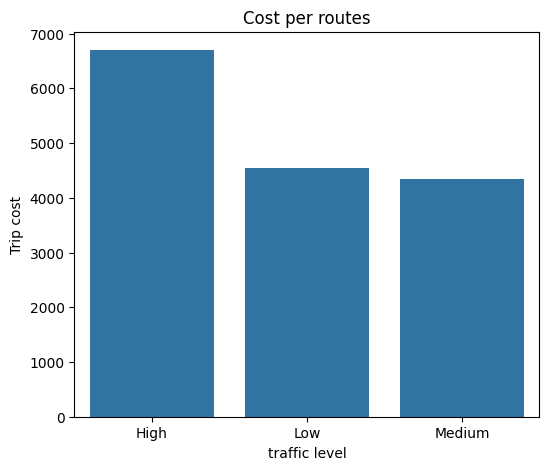

In [19]:
#High-cost vs Low-cost routes
route_cost = Final_master_df.groupby("traffic_level", as_index=False)["total_trip_cost"].mean()
plt.figure(figsize=(6,5))
sns.barplot(data=route_cost,x="traffic_level",y="total_trip_cost")
plt.title("Cost per routes")
plt.xlabel("traffic level")
plt.ylabel("Trip cost")
plt.show()


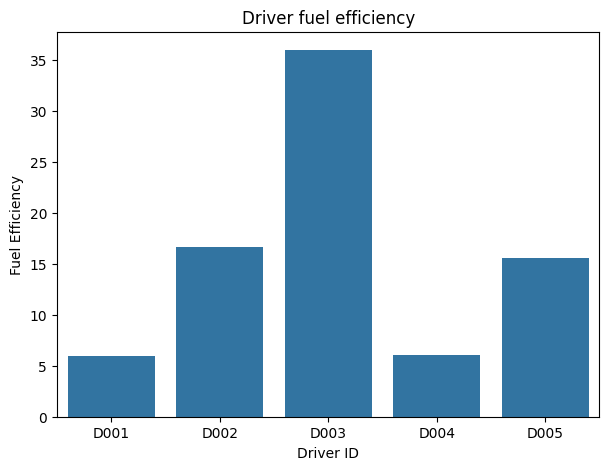

In [20]:
#High performing drivers
driver_efficiency = Final_master_df.groupby("driver_id", as_index=False)["fuel_efficiency"].mean()
plt.figure(figsize=(7,5))
sns.barplot(data=driver_efficiency,x="driver_id",y="fuel_efficiency")
plt.title("Driver fuel efficiency")
plt.xlabel("Driver ID")
plt.ylabel("Fuel Efficiency")
plt.show()


In [21]:
#Route category comparision
route_category= Final_master_df.groupby("traffic_level", as_index=False).agg({
    "fuel_efficiency": "mean",
    "cost_per_km": "mean"})
print(route_category)

  traffic_level  fuel_efficiency  cost_per_km
0          High         6.050847    64.583333
1           Low        16.145833    16.566667
2        Medium        36.000000    24.166667


In [22]:
Final_master_df.to_csv("Final_Transportation_Data.csv", index=False)